### Universidad Nacional de Lujan - Bases de Datos Masivas (11088) - Cavasin Nicolas #143501
# TP05-02 - Clustering

### Ejercicio 6:
**Algoritmos jerárquicos**. Incorpore en Colab nuevamente el dataset del punto 5 y realice las siguientes actividades:

- Realice el agrupamiento de los datos utilizando diferentes parámetros.

- Grafique el resultado y escoja cual es el nivel que mejor agrupa los datos.


In [1]:
# Obtengo el dataset
!rm ds-abandono.xls
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0502/ds-abandono.xls
# Importo pandas para lectura
import pandas as pd

# Leo el dataset
abandono = pd.read_excel('ds-abandono.xls')

abandono.head()

rm: cannot remove 'ds-abandono.xls': No such file or directory
--2020-11-24 14:32:28--  https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0502/ds-abandono.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4633088 (4.4M) [application/octet-stream]
Saving to: ‘ds-abandono.xls’

ds-abandono.xls     100%[===================>]   4.42M  --.-KB/s    in 0.1s    

2020-11-24 14:32:29 (41.8 MB/s) - ‘ds-abandono.xls’ saved [4633088/4633088]



,legajo,estado_civil,carrera,carrera_grado,sede,anio_ingreso,horas_trabajadas,masculino,femenino,edad_ingreso,colegio_publico,argentino,activo_primer_anio,activo_segundo_anio,estado,promedio_1er_anio,anios_en_unlu,aprobadas_1er_anio,anios_cursados,c_promociones_1er_anio,c_libres_1er_anio,c_regulares_1er_anio,c_ausentes_1er_anio,c_noausentes_1er_anio,cursadas_ap_1er_anio,cursadas_1er_anio,cambio_universidad,cambio_carrera,progresar_2016,fracaso_academico,activo_2017
0,1,SOLTERO/A,LICENCIATURA EN ENFERMERIA,1,SEDE LUJAN,2016,0,0,1,22,1,1,1,0,INHABILITADO,2.33,1.0,0,1,0,3,4,8,8,4,16,0,1,0,0,0
1,2,UNIDO/A,LICENCIATURA EN TRABAJO SOCIAL,1,SEDE LUJAN,2014,0,0,1,21,1,1,0,1,LIBRE,-,2.0,0,2,0,0,1,3,1,1,4,0,0,1,0,0
2,3,CASADO/A,LICENCIATURA EN CS. DE LA EDUCACION,1,SEDE LUJAN,2014,0,0,1,54,1,1,1,0,LIBRE,-,3.0,0,3,0,0,0,2,0,0,2,0,1,0,0,0
3,4,SOLTERO/A,CONTADOR PUBLICO,1,D.A. MERCEDES,2014,0,0,1,28,1,1,1,0,LIBRE,-,3.0,0,3,0,0,0,2,0,0,2,0,0,0,0,0
4,5,SOLTERO/A,CONTADOR PUBLICO,1,SEDE LUJAN,2016,24,0,1,28,1,1,1,1,REGULAR,2,2.0,0,2,0,0,1,0,1,1,1,0,0,0,0,1


Se incorpora el mismo dataset y se realiza el mismo análisis de PCA sobre las variables numéricas, es por eso se repiten cosas realizadas en el punto 5.

In [10]:
# Importo para escalar
from sklearn.preprocessing import scale

# Defino las features
features = ['anio_ingreso', 'horas_trabajadas', 'edad_ingreso', 'anios_en_unlu', 'anios_cursados',
            'c_promociones_1er_anio', 'c_libres_1er_anio', 'c_regulares_1er_anio', 'c_ausentes_1er_anio',
            'c_noausentes_1er_anio', 'cursadas_1er_anio', 'cursadas_ap_1er_anio']

print('Features seleccionadas:')
print(features)

## Imputo por la media la columna anios_en_unlu
abandono.fillna(abandono['anios_en_unlu'].mean(), inplace=True)

# Ahora escalo
abandono_scaled = scale(abandono[features])

# Lo muestro
print(f'\nPrimeras 10 tuplas de las features escaladas:\n{abandono_scaled[1:10]}')

Features seleccionadas:
['anio_ingreso', 'horas_trabajadas', 'edad_ingreso', 'anios_en_unlu', 'anios_cursados', 'c_promociones_1er_anio', 'c_libres_1er_anio', 'c_regulares_1er_anio', 'c_ausentes_1er_anio', 'c_noausentes_1er_anio', 'cursadas_1er_anio', 'cursadas_ap_1er_anio']

Primeras 10 tuplas de las features escaladas:
[[-1.25023409 -0.75244423 -0.31063595  0.12109221  0.27705756 -0.67087661
  -0.90083919 -0.16216549  0.68227621 -0.91289099 -0.58227877 -0.54624585]
 [-1.25023409 -0.75244423  3.88017378  1.06519505  1.42100555 -0.67087661
  -0.90083919 -0.77291282  0.11267235 -1.2067591  -1.19242385 -0.88979749]
 [-1.25023409 -0.75244423  0.57832369  1.06519505  1.42100555 -0.67087661
  -0.90083919 -0.77291282  0.11267235 -1.2067591  -1.19242385 -0.88979749]
 [ 1.20720558  0.55275087  0.57832369  0.12109221  0.27705756 -0.67087661
  -0.90083919 -0.16216549 -1.02653538 -0.91289099 -1.49749639 -0.54624585]
 [-1.25023409 -0.42614546  0.32433522  2.0092979   1.42100555  0.34216754
  -0.90

In [8]:
# Grafico biplot (ver referencias al final de la notebook)
def myplot(score,coeff,labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.5/(xs.max() - xs.min())
    scaley = 1.5/(ys.max() - ys.min())
    plt.figure(figsize=(9,9))
    plt.scatter(xs * scalex, ys * scaley, c='white', edgecolors='red', alpha=0.3)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'black', alpha = 0.75)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Feature"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("Componente principal {}".format(1))
    plt.ylabel("Componente principal {}".format(2))
    plt.title('Biplot de las primeras dos CPs')
    plt.grid

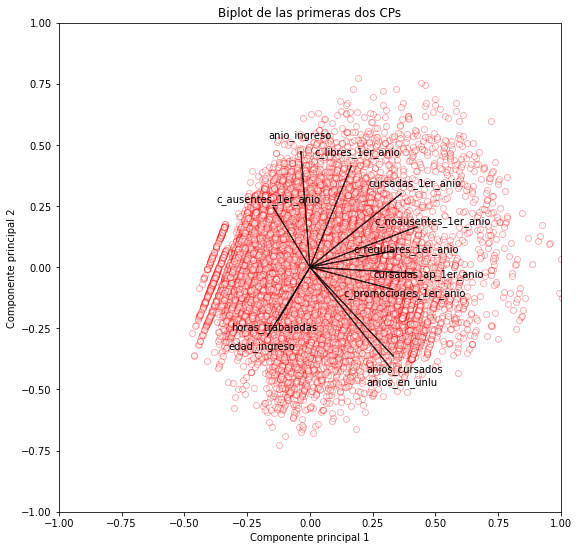

In [12]:
# Importo para hacer PCA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Instancio indicando que deseo capturar al menos 80% de la varianza 
pca = PCA(.80)

# Entreno y transformo
abandono_pca = pca.fit_transform(abandono_scaled)

# Muestro el biplot
myplot(abandono_pca[:,0:2], np.transpose(pca.components_[0:2, :]), features)
plt.show()

In [21]:
# Importo para agrupar por jerarquia
from scipy.spatial.distance import pdist, squareform

# Muestro la matriz de distancias entre cada CP
print(f'Matriz de distancias entre cada CP del PCA:\n{squareform(pdist(abandono_pca))}')

Matriz de distancias entre cada CP del PCA:
[[0.         6.3931055  8.37543233 ... 7.92106247 8.02272993 7.80669658]
 [6.3931055  0.         3.05897214 ... 2.94387245 4.56053998 2.74964432]
 [8.37543233 3.05897214 0.         ... 3.25941204 5.33784843 3.49021562]
 ...
 [7.92106247 2.94387245 3.25941204 ... 0.         2.38170829 0.49642227]
 [8.02272993 4.56053998 5.33784843 ... 2.38170829 0.         2.4102148 ]
 [7.80669658 2.74964432 3.49021562 ... 0.49642227 2.4102148  0.        ]]


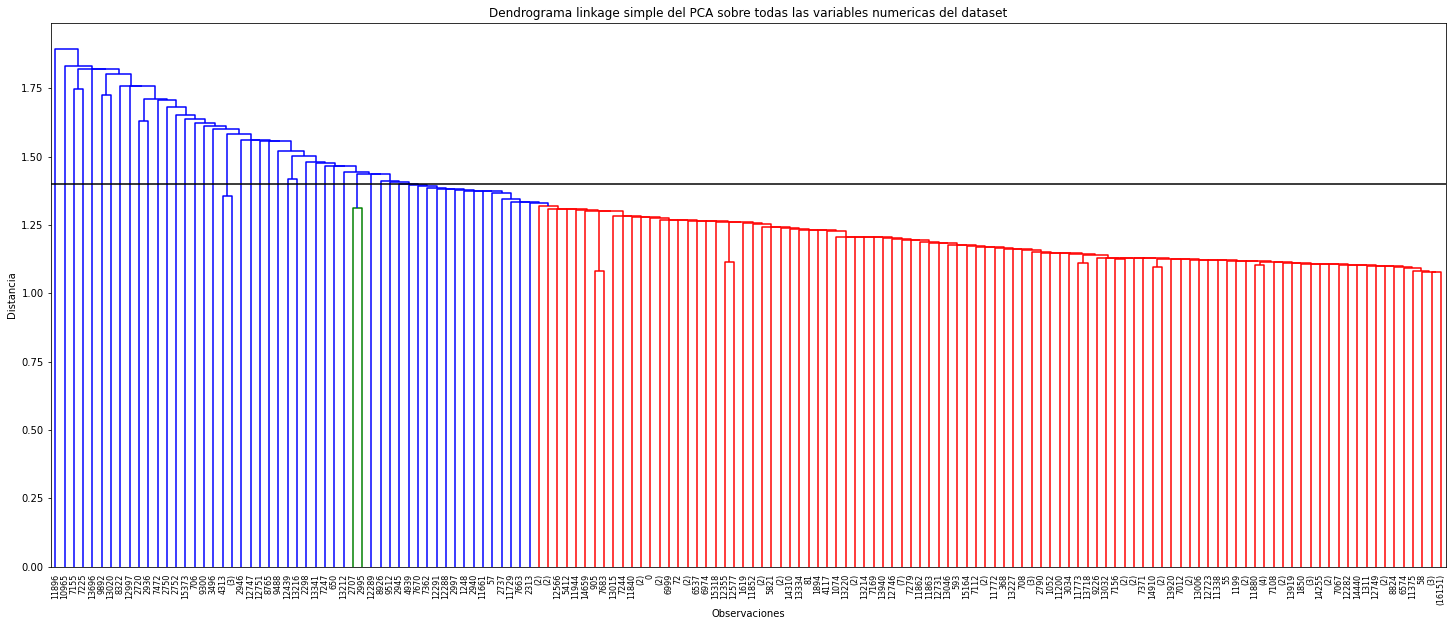

In [33]:
# Importo para agrupar aglomerativamente
from scipy.cluster.hierarchy import dendrogram, linkage

# Determino linkage simple para el clustering jerarquico aglomerativo
# Linkage = min_dist o max_similitud
H = linkage(abandono_pca, 'single')

## Grafico el dendrograma del clustering jerarquico aglomerativo

# Defino la altura de corte
max_d = 1.40

plt.figure(figsize=(25, 10))
plt.title('Dendrograma linkage simple del PCA sobre todas las variables numericas del dataset')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

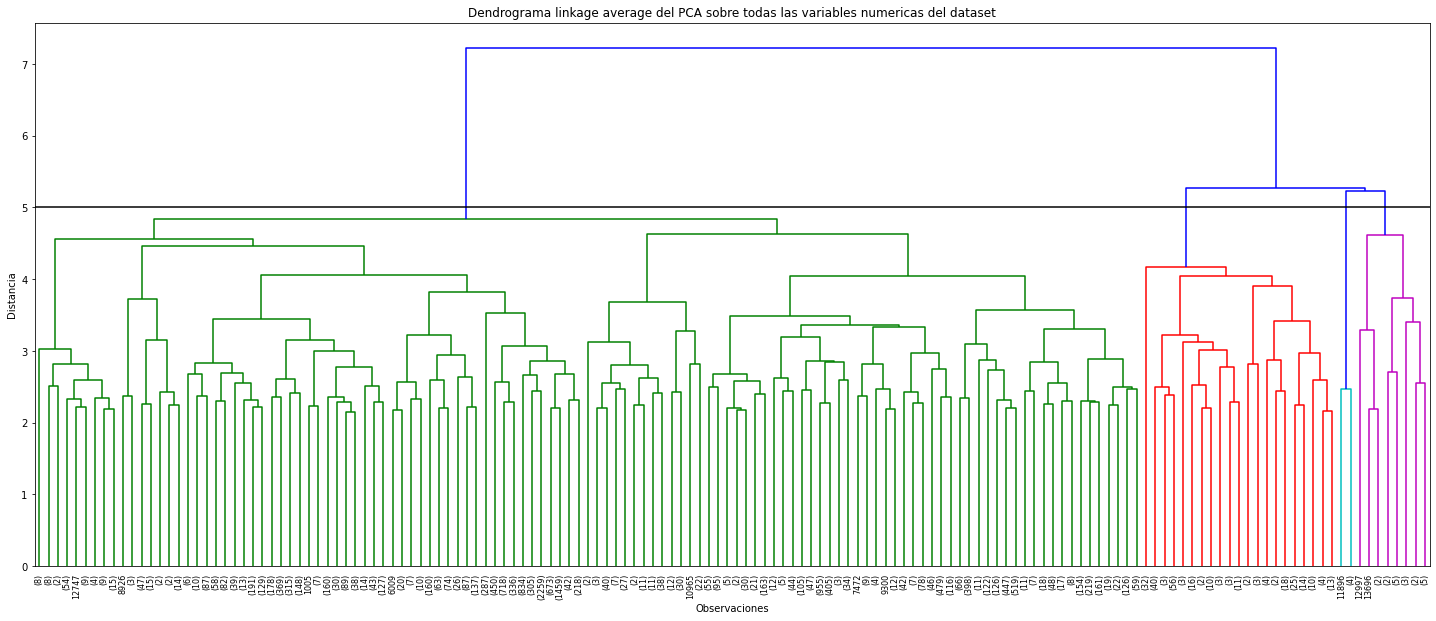

In [34]:
# Determino linkage average para el clustering jerarquico aglomerativo
# average = dist_prom entre cada observacion
H = linkage(abandono_pca, 'average')

# Grafico el dendrograma del clustering jerarquico aglomerativo

# Defino la altura de corte
max_d = 5

plt.figure(figsize=(25, 10))
plt.title('Dendrograma linkage average del PCA sobre todas las variables numericas del dataset')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

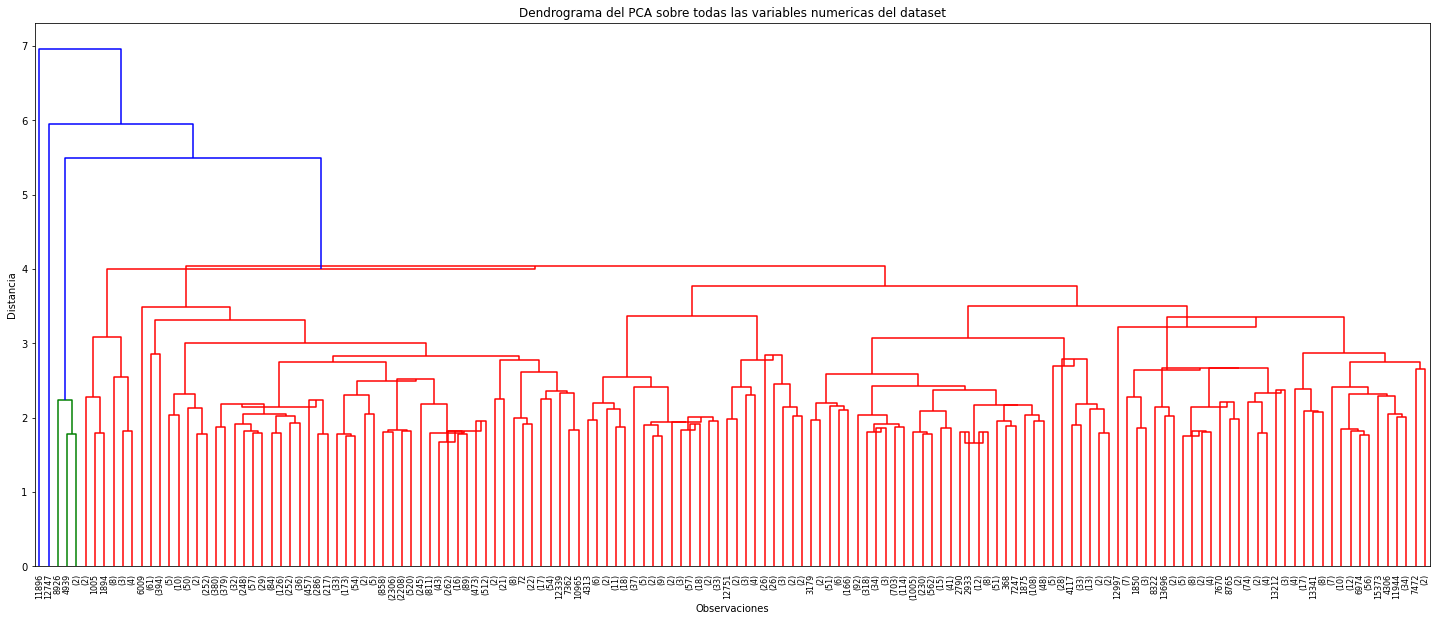

In [32]:
# Determino linkage por centroide para el clustering jerarquico aglomerativo
# average = dist_prom entre cada observacion
H = linkage(abandono_pca, 'centroid')

# Grafico el dendrograma del clustering jerarquico aglomerativo

plt.figure(figsize=(25, 10))
plt.title('Dendrograma linkage por centroides del PCA sobre todas las variables numericas del dataset')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

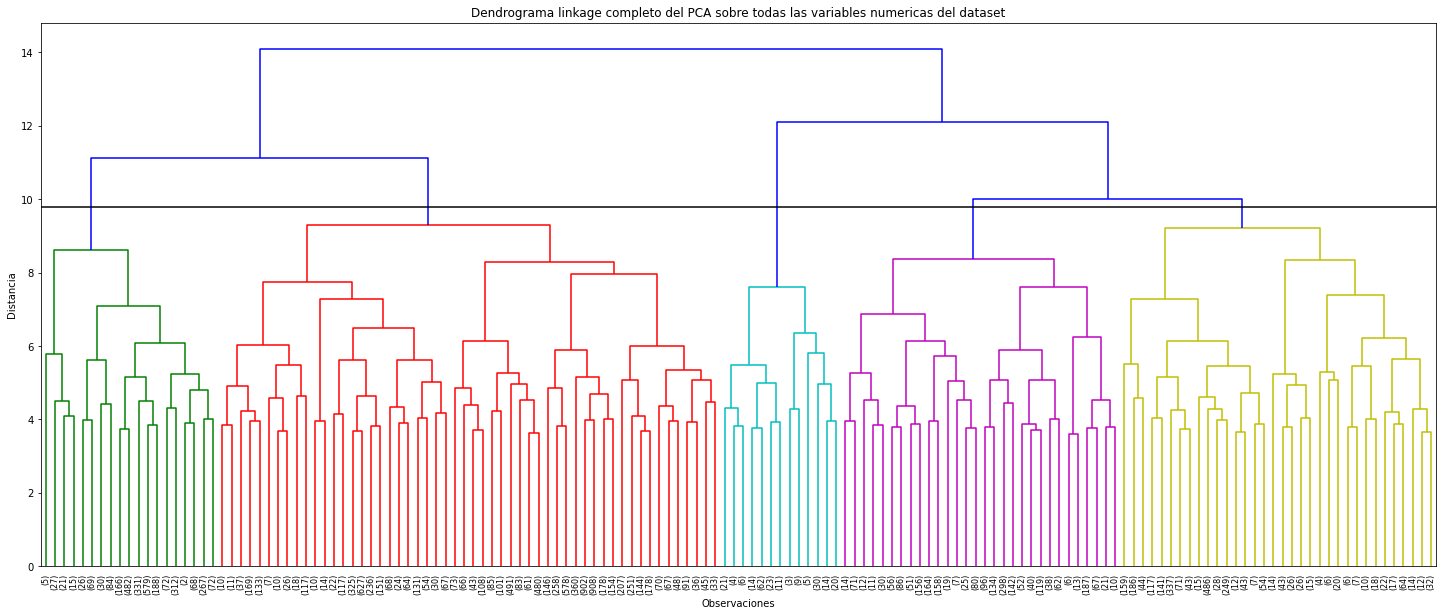

In [30]:
# Determino linkage completo para el clustering jerarquico aglomerativo
# complete = max_dist o min_sim
H = linkage(abandono_pca, 'complete')

# Grafico el dendrograma del clustering jerarquico aglomerativo

# Defino la altura de corte
max_d = 9.8

plt.figure(figsize=(25, 10))
plt.title('Dendrograma linkage completo del PCA sobre todas las variables numericas del dataset')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

## Conclusiones:

- Se detecta sin dudas que el mejor método para agrupar este dataset utilizando un algoritmo jerárquico y aglomerativo es utilizando linkage completo.

- Respecto al valor de corte se pueden utilizar varios criterios. Sin embargo, los colores del gráfico dicen mucho por nosotros y es preferible utilizar una altura que *evite que se fusionen clusters de diferente color* (lo que se traduciría en una mezcla de grupos con diferentes características).

- Es por esto que se decidió que la altura de corte sea 9.8 sobre el eje Y, un valor que evita la fusión de clusters.